In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Importing data into a DataFrame
df = pd.read_excel('/Users/qlfzn/ML:DS Projects/fifa_project/archive-4/updated_trending_football_players.xlsx')
df.head(10)

,Player_name,Images,Age,National_team,Positions,Overall,Potential_overall,Current_club,Contract_start,Contract_end,Value,Wage,Total_stats
0,T. Almada,https://cdn.sofifa.net/players/245/371/24_60.png,22,Argentina,"CAM, CM, CF",79,87,Atlanta United,2022,2025,39500000,10000,2050
1,L. Palma,https://cdn.sofifa.net/player_0.svg,23,Honduras,LW,69,75,Celtic,2023,2028,2200000,22000,1794
2,R. Lavia,https://cdn.sofifa.net/players/263/620/24_60.png,19,Belgium,CDM,73,86,Chelsea,2023,2030,7000000,32000,1829
3,W. Zaïre-Emery,https://cdn.sofifa.net/players/270/673/24_60.png,17,France,"CM, CDM",77,89,Paris Saint Germain,2022,2025,24000000,9000,2080
4,Gabri Veiga,https://cdn.sofifa.net/players/258/729/24_60.png,21,Spain,"CM, CAM",78,89,Al Ahli Jeddah,2023,2026,31500000,28000,1944
5,J. Bellingham,https://cdn.sofifa.net/players/270/964/24_60.png,17,England,"CAM, CM",64,82,Sunderland,2023,2028,1500000,1000,1714
6,K. Havertz,https://cdn.sofifa.net/players/235/790/24_60.png,24,Germany,"CAM, RW, ST",82,87,Arsenal,2023,2028,46000000,110000,2044
7,A. Vermeeren,https://cdn.sofifa.net/players/269/859/24_60.png,18,Belgium,"CDM, CM",74,87,Antwerp,2022,2026,9500000,7000,1883
8,R. Højlund,https://cdn.sofifa.net/players/259/399/24_60.png,20,Denmark,ST,77,89,Manchester United,2023,2028,25500000,77000,1841
9,J. Bellingham,https://cdn.sofifa.net/players/252/371/24_60.png,20,England,"CAM, CM",87,91,Real Madrid,2023,2029,112000000,190000,2265


In [5]:
df.shape

(2306, 13)

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,2306.0,2.404987e+01,4.513141e+00,16.0,21.00,23.0,27.0,44.0
Overall,2306.0,7.255637e+01,6.871525e+00,49.0,68.00,73.0,77.0,91.0
Potential_overall,2306.0,7.897832e+01,4.999736e+00,54.0,76.00,79.0,82.0,94.0
Value,2306.0,1.087117e+07,1.688357e+07,0.0,1900000.00,4300000.0,12500000.0,185000000.0
Wage,2306.0,2.870384e+04,3.838966e+04,0.0,5000.00,15000.0,38000.0,350000.0
Total_stats,2306.0,1.786043e+03,2.594687e+02,791.0,1647.25,1820.5,1962.0,2323.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Player_name        2306 non-null   object
 1   Images             2306 non-null   object
 2   Age                2306 non-null   int64 
 3   National_team      2306 non-null   object
 4   Positions          2306 non-null   object
 5   Overall            2306 non-null   int64 
 6   Potential_overall  2306 non-null   int64 
 7   Current_club       2306 non-null   object
 8   Contract_start     2306 non-null   object
 9   Contract_end       2058 non-null   object
 10  Value              2306 non-null   int64 
 11  Wage               2306 non-null   int64 
 12  Total_stats        2306 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 234.3+ KB


In [8]:
df.dtypes

Player_name          object
Images               object
Age                   int64
National_team        object
Positions            object
Overall               int64
Potential_overall     int64
Current_club         object
Contract_start       object
Contract_end         object
Value                 int64
Wage                  int64
Total_stats           int64
dtype: object

In [9]:
df.isnull().sum()

Player_name            0
Images                 0
Age                    0
National_team          0
Positions              0
Overall                0
Potential_overall      0
Current_club           0
Contract_start         0
Contract_end         248
Value                  0
Wage                   0
Total_stats            0
dtype: int64

In [10]:
df['Contract_end'].fillna(0, inplace=True)

In [11]:
# Adding a new column for Player_category
df['Player_category'] = None
df.head(10)

,Player_name,Images,Age,National_team,Positions,Overall,Potential_overall,Current_club,Contract_start,Contract_end,Value,Wage,Total_stats,Player_category
0,T. Almada,https://cdn.sofifa.net/players/245/371/24_60.png,22,Argentina,"CAM, CM, CF",79,87,Atlanta United,2022,2025,39500000,10000,2050,None
1,L. Palma,https://cdn.sofifa.net/player_0.svg,23,Honduras,LW,69,75,Celtic,2023,2028,2200000,22000,1794,None
2,R. Lavia,https://cdn.sofifa.net/players/263/620/24_60.png,19,Belgium,CDM,73,86,Chelsea,2023,2030,7000000,32000,1829,None
3,W. Zaïre-Emery,https://cdn.sofifa.net/players/270/673/24_60.png,17,France,"CM, CDM",77,89,Paris Saint Germain,2022,2025,24000000,9000,2080,None
4,Gabri Veiga,https://cdn.sofifa.net/players/258/729/24_60.png,21,Spain,"CM, CAM",78,89,Al Ahli Jeddah,2023,2026,31500000,28000,1944,None
5,J. Bellingham,https://cdn.sofifa.net/players/270/964/24_60.png,17,England,"CAM, CM",64,82,Sunderland,2023,2028,1500000,1000,1714,None
6,K. Havertz,https://cdn.sofifa.net/players/235/790/24_60.png,24,Germany,"CAM, RW, ST",82,87,Arsenal,2023,2028,46000000,110000,2044,None
7,A. Vermeeren,https://cdn.sofifa.net/players/269/859/24_60.png,18,Belgium,"CDM, CM",74,87,Antwerp,2022,2026,9500000,7000,1883,None
8,R. Højlund,https://cdn.sofifa.net/players/259/399/24_60.png,20,Denmark,ST,77,89,Manchester United,2023,2028,25500000,77000,1841,None
9,J. Bellingham,https://cdn.sofifa.net/players/252/371/24_60.png,20,England,"CAM, CM",87,91,Real Madrid,2023,2029,112000000,190000,2265,None


In [12]:
# Categorise players into defence and offence
def categorise_players(position):
    if position in ('GK', 'CB', 'RB', 'RWB', 'LB', 'LWB'):
        category = 0
    else:
        category = 1

    return category

df['Player_category'] =  df['Positions'].apply(categorise_players)


In [13]:
df.head(10)

,Player_name,Images,Age,National_team,Positions,Overall,Potential_overall,Current_club,Contract_start,Contract_end,Value,Wage,Total_stats,Player_category
0,T. Almada,https://cdn.sofifa.net/players/245/371/24_60.png,22,Argentina,"CAM, CM, CF",79,87,Atlanta United,2022,2025,39500000,10000,2050,1
1,L. Palma,https://cdn.sofifa.net/player_0.svg,23,Honduras,LW,69,75,Celtic,2023,2028,2200000,22000,1794,1
2,R. Lavia,https://cdn.sofifa.net/players/263/620/24_60.png,19,Belgium,CDM,73,86,Chelsea,2023,2030,7000000,32000,1829,1
3,W. Zaïre-Emery,https://cdn.sofifa.net/players/270/673/24_60.png,17,France,"CM, CDM",77,89,Paris Saint Germain,2022,2025,24000000,9000,2080,1
4,Gabri Veiga,https://cdn.sofifa.net/players/258/729/24_60.png,21,Spain,"CM, CAM",78,89,Al Ahli Jeddah,2023,2026,31500000,28000,1944,1
5,J. Bellingham,https://cdn.sofifa.net/players/270/964/24_60.png,17,England,"CAM, CM",64,82,Sunderland,2023,2028,1500000,1000,1714,1
6,K. Havertz,https://cdn.sofifa.net/players/235/790/24_60.png,24,Germany,"CAM, RW, ST",82,87,Arsenal,2023,2028,46000000,110000,2044,1
7,A. Vermeeren,https://cdn.sofifa.net/players/269/859/24_60.png,18,Belgium,"CDM, CM",74,87,Antwerp,2022,2026,9500000,7000,1883,1
8,R. Højlund,https://cdn.sofifa.net/players/259/399/24_60.png,20,Denmark,ST,77,89,Manchester United,2023,2028,25500000,77000,1841,1
9,J. Bellingham,https://cdn.sofifa.net/players/252/371/24_60.png,20,England,"CAM, CM",87,91,Real Madrid,2023,2029,112000000,190000,2265,1


In [14]:
# Remove images column
df = df.drop('Images', axis=1)

Exploratory Data Analyis (EDA)

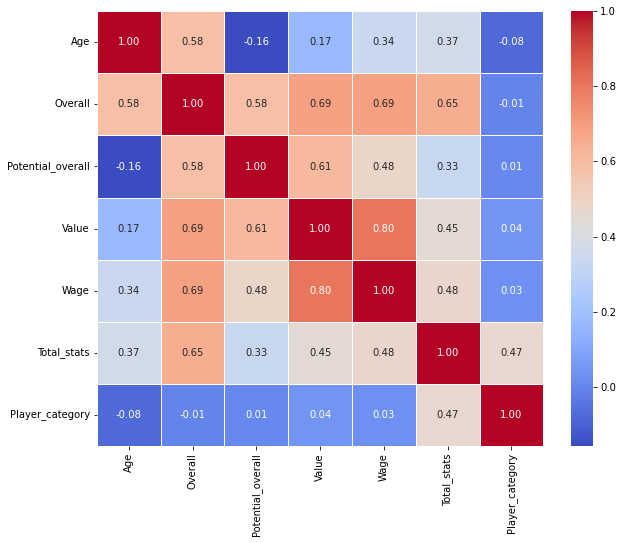

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

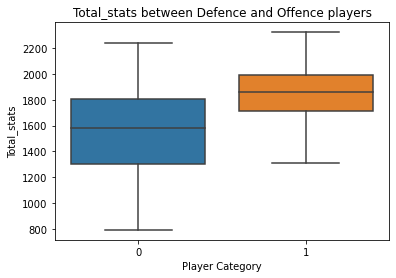

In [16]:
sns.boxplot(data=df, x='Player_category', y='Total_stats')

plt.xlabel('Player Category')
plt.ylabel('Total_stats')
plt.title('Total_stats between Defence and Offence players')
plt.show()

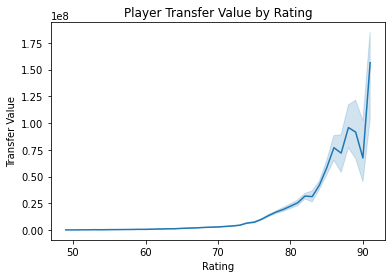

In [17]:
sns.lineplot(data=df, x= 'Overall', y= 'Value')

plt.title('Player Transfer Value by Rating')
plt.xlabel('Rating')
plt.ylabel('Transfer Value')
plt.show()

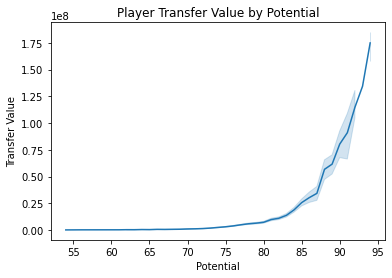

In [18]:
sns.lineplot(data=df, x= 'Potential_overall', y= 'Value')

plt.title('Player Transfer Value by Potential')
plt.xlabel('Potential')
plt.ylabel('Transfer Value')
plt.show()

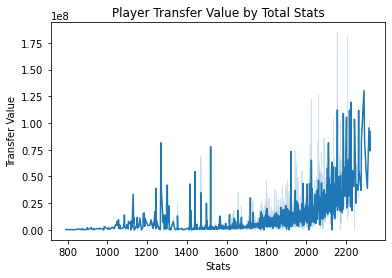

In [19]:
sns.lineplot(data=df, x= 'Total_stats', y= 'Value')

plt.title('Player Transfer Value by Total Stats')
plt.xlabel('Stats')
plt.ylabel('Transfer Value')
plt.show()

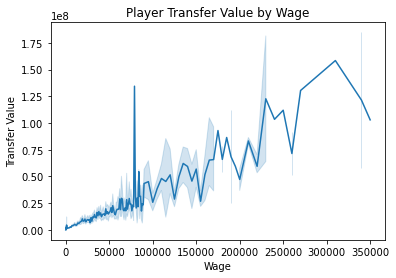

In [20]:
sns.lineplot(data=df, x='Wage', y='Value')

plt.title('Player Transfer Value by Wage')
plt.xlabel('Wage')
plt.ylabel('Transfer Value')
plt.show()

In [21]:
# Scaling method using Min-Max scaler
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

numerical_cols = ['Age', 'Overall', 'Potential_overall', 'Value', 'Wage', 'Total_stats']
mm_scaled_data = min_max_scaler.fit_transform(df[numerical_cols])
minMax_df = pd.DataFrame(mm_scaled_data, columns=numerical_cols)


In [22]:
minMax_df.head()

,Age,Overall,Potential_overall,Value,Wage,Total_stats
0,0.214286,0.714286,0.825,0.213514,0.028571,0.821802
1,0.250000,0.476190,0.525,0.011892,0.062857,0.654700
2,0.107143,0.571429,0.800,0.037838,0.091429,0.677546
3,0.035714,0.666667,0.875,0.129730,0.025714,0.841384
4,0.178571,0.690476,0.875,0.170270,0.080000,0.752611


Model Training & Evaluation

In [23]:
# Split dataset for training and testing
from sklearn.model_selection import train_test_split

X = minMax_df.drop(['Value'], axis=1)
y = minMax_df['Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

X_train:  (1614, 5)
y_train:  (1614,)


In [25]:
# Importing algorithm libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [26]:
# Algorithm #1 - Linear Regression

lreg_model = LinearRegression()
lreg_model.fit(X_train, y_train)
y_pred_lreg = lreg_model.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred_lreg)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, y_pred_lreg)

print("\nLinear Regression Evaluation:")
print("Mean Squared Error (MSE):", lr_mse)
print("Root Mean Squared Error (RMSE):", lr_rmse)
print("Mean Absolute Error (MAE):", lr_mae)



Linear Regression Evaluation:
Mean Squared Error (MSE): 0.0017856196798090758
Root Mean Squared Error (RMSE): 0.042256593329432934
Mean Absolute Error (MAE): 0.02896338833174792


In [27]:
# Algorithm #2 - Random Forest

rand_forest_model = RandomForestRegressor(n_estimators=300, max_features='sqrt', max_depth=5, random_state=18)
rand_forest_model.fit(X_train, y_train)
y_pred_rand_forest = rand_forest_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rand_forest)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_pred_rand_forest)

print("\nRandom Forest Evaluation:")
print("Mean Squared Error (MSE):", rf_mse)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("Mean Absolute Error (MAE):", rf_mae)


Random Forest Evaluation:
Mean Squared Error (MSE): 0.0002681735986371943
Root Mean Squared Error (RMSE): 0.016376006797665734
Mean Absolute Error (MAE): 0.009459264071562307


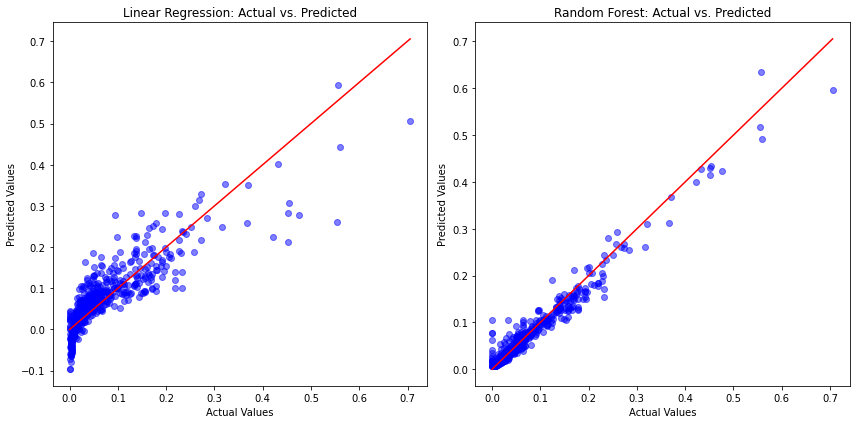

In [30]:
import matplotlib.pyplot as plt

y_actual = y_test

# Visualisation - Linear Regression
plt.figure(figsize=(12, 6))  

plt.subplot(1, 2, 1)  
plt.scatter(y_actual, y_pred_lreg, color='blue', alpha=0.5)
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red')  # Diagonal line indicating perfect predictions
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Visualisation - Random Forest
plt.subplot(1, 2, 2)  
plt.scatter(y_actual, y_pred_rand_forest, color='blue', alpha=0.5)
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red')  # Diagonal line indicating perfect predictions
plt.title('Random Forest: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()


In [31]:
# Checking for possibility of overfitting - k-Fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

models = {'LinearRegression': lreg_model, 
          'RandomForestRegressor': rand_forest_model}

print("Cross-validation scores: \n")

folds = KFold(n_splits=5, shuffle=True, random_state=100)
for model_name, model_instance in models.items():
    scores = cross_val_score(model_instance, X_train, y_train, scoring='r2', cv=folds)
    print(model_name, ': ', scores)


Cross-validation scores

LinearRegression :  [0.76518595 0.64062578 0.72368192 0.7605456  0.73594758]
RandomForestRegressor :  [0.96140069 0.89496995 0.91911274 0.96162303 0.94683253]


In [33]:
# To find R-squared of test sets
from sklearn.metrics import r2_score

predictions = {'LinearRegression': y_pred_lreg, 
          'RandomForestRegressor': y_pred_rand_forest}

print("R-squared scores: \n")

for model_name, model_pred in predictions.items():
    r2_test = r2_score(y_test, model_pred)
    print(model_name, ": ", r2_test)

R-squared scores: 

LinearRegression :  0.7440433497125863
RandomForestRegressor :  0.9615591064665927
